In [3]:
import pandas as pd


df = pd.read_csv('shopping_trends.csv')

print("Розмір таблиці:", df.shape)
print("----------------")
print("Пропуски в даних:\n", df.isnull().sum())
print("----------------")
print("Типи стовпців:\n", df.dtypes)

Розмір таблиці: (3900, 19)
----------------
Пропуски в даних:
 Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64
----------------
Типи стовпців:
 Customer ID                   int64
Age                           int64
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)         int64
Location                     object
Size                         object
Color                        obje

In [5]:
# I. Застосуйте алгоритм K-means для кластеризації даних:
# 1.Виберіть вищезазначені числові стовпці і створіть новий DataFrame

selected_columns = ["Age", "Purchase Amount (USD)", "Review Rating", "Previous Purchases"]
new_df = df[selected_columns].copy()

new_df.columns = ["age", "purchase_amount_usd", "review_rating", "previous_purchases"]
print("Типи стовпців:\n", new_df.dtypes)

Типи стовпців:
 age                      int64
purchase_amount_usd      int64
review_rating          float64
previous_purchases       int64
dtype: object


In [6]:
# 2. Проведіть масштабування даних

from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

scaled_features = scaler.fit_transform(new_df)

scaled_df = pd.DataFrame(scaled_features, columns=new_df.columns)

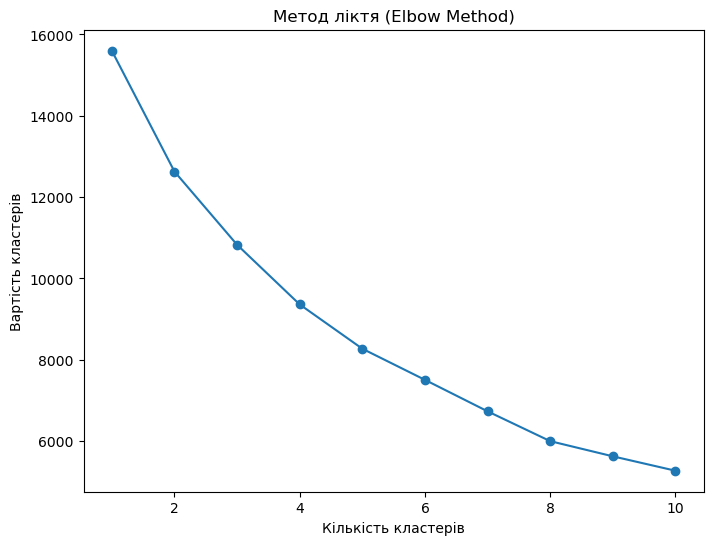

In [18]:
# II. Визначення кількості кластерів:
# 1. Використайте метод ліктя (Elbow Method)
# 2. Побудуйте графік вартості кластерів 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42 , n_init=10)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Кількість кластерів')
plt.ylabel('Вартість кластерів')
plt.title('Метод ліктя (Elbow Method)')
plt.show()

In [19]:
# 3. Кластеризація за допомогою K-means:
optimal_clusters = 2

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42 , n_init=10)
kmeans.fit(scaled_df)

cluster_labels = kmeans.labels_

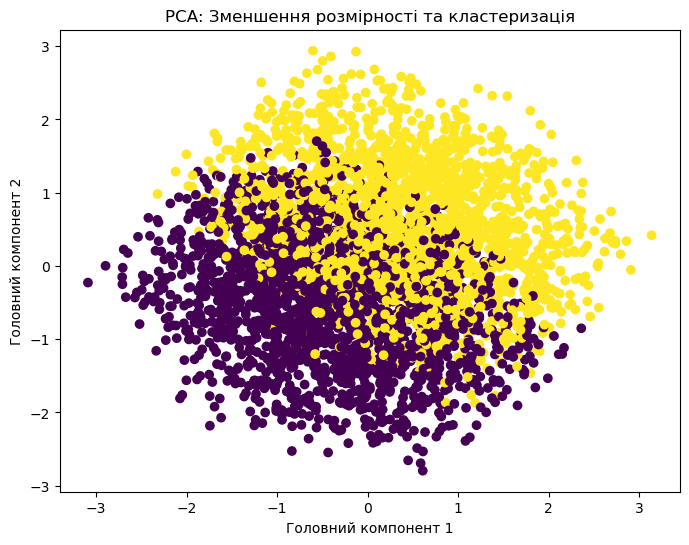

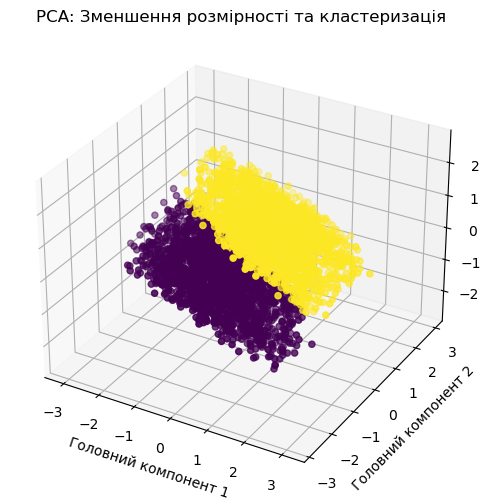

In [25]:
# III. Візуалізація результатів:

from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_df)  # scaled_df - ваші масштабовані дані

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Головний компонент 1')
plt.ylabel('Головний компонент 2')
plt.title('PCA: Зменшення розмірності та кластеризація')
plt.show()

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=cluster_labels, cmap='viridis')
ax.set_xlabel('Головний компонент 1')
ax.set_ylabel('Головний компонент 2')
ax.set_zlabel('Головний компонент 3')
plt.title('PCA: Зменшення розмірності та кластеризація')
plt.show()

